In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

Testing the downsampling. 

In [3]:
import torch.nn as nn
import torch

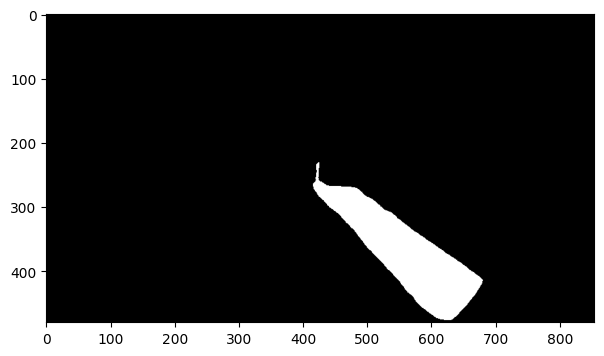

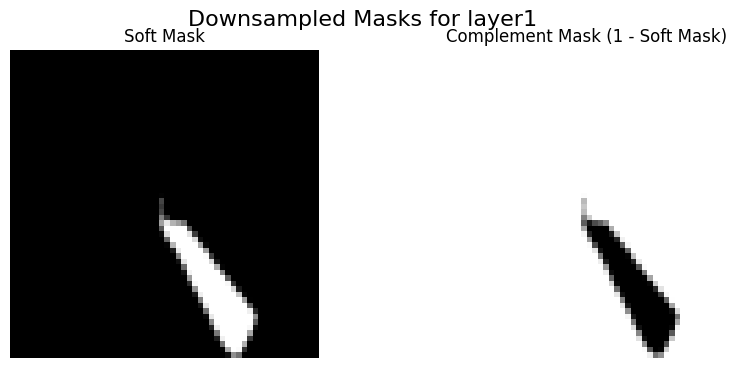

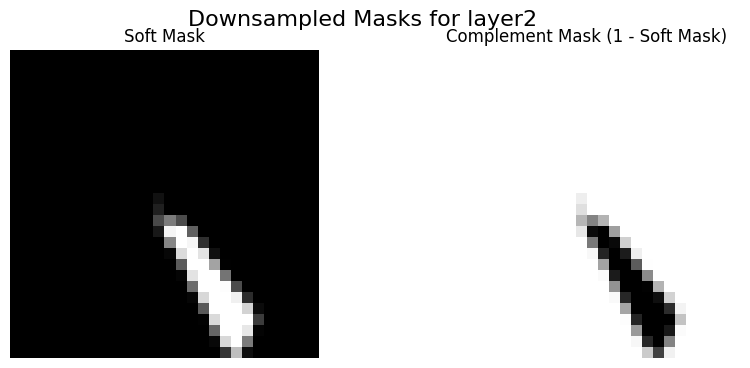

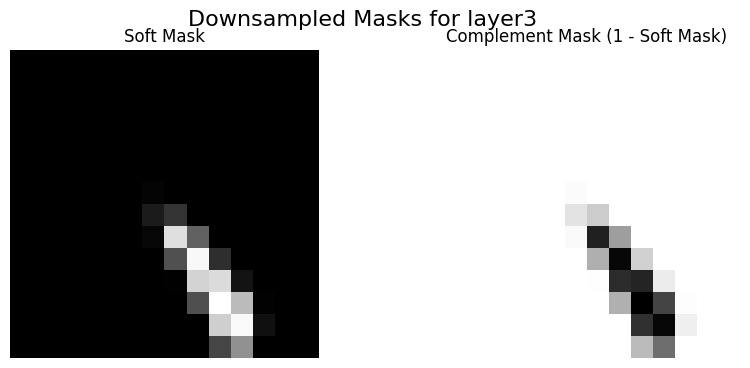

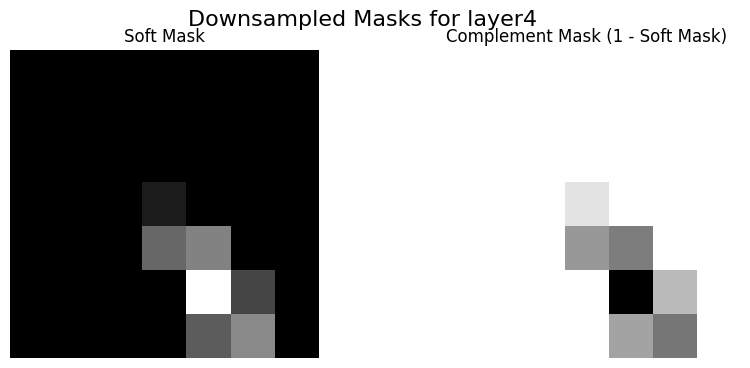

In [1]:
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Define the mask downsamplers
mask_downsamplers = nn.ModuleDict({
    "layer1": nn.AdaptiveAvgPool2d((56, 56)),  # Match FPN layer1 size
    "layer2": nn.AdaptiveAvgPool2d((28, 28)),  # Match FPN layer2 size
    "layer3": nn.AdaptiveAvgPool2d((14, 14)),  # Match FPN layer3 size
    "layer4": nn.AdaptiveAvgPool2d((7, 7)),   # Match FPN layer4 size
})

# Path to the mask
mask_path = "../data/triplet_segmentation_dataset_tiny_second_stage/test/ann_second_stage/t50_VID49_000180,hook,1,dissect,gallbladder.png"

# Load the mask using OpenCV or PIL
mask = Image.open(mask_path).convert("L")  # Convert to grayscale
mask = np.array(mask, dtype=np.float32) / 255.0  # Normalize to [0, 1]

plt.figure(figsize=(10, 4))
plt.imshow(mask, cmap="gray")
plt.show()



# Convert the mask to a PyTorch tensor
mask_tensor = torch.tensor(mask).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, H, W]

# Visualize the downsampled masks
for level, downsampler in mask_downsamplers.items():
    # Downsample the mask
    soft_mask = downsampler(mask_tensor)  # Shape: [1, 1, H_out, W_out]
    soft_mask_np = soft_mask.squeeze().detach().numpy()  # Convert to NumPy array for visualization

    # Compute the complement mask (1 - soft_mask)
    complement_mask_np = 1 - soft_mask_np

    # Visualize the soft mask and its complement
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Downsampled Masks for {level}", fontsize=16)

    # Soft mask
    plt.subplot(1, 2, 1)
    plt.imshow(soft_mask_np, cmap="gray")
    plt.title("Soft Mask")
    plt.axis("off")

    # Complement mask
    plt.subplot(1, 2, 2)
    plt.imshow(complement_mask_np, cmap="gray")
    plt.title("Complement Mask (1 - Soft Mask)")
    plt.axis("off")

    plt.show()
